In [22]:
import numpy as np
import random as rd
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [23]:
strokes = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [24]:
strokes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [25]:
strokes.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [26]:
strokes.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<AxesSubplot:xlabel='smoking_status', ylabel='stroke'>

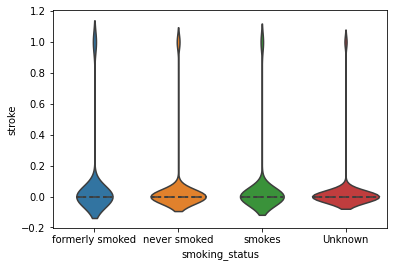

In [27]:
sns.violinplot(y='stroke', x='smoking_status', data=strokes, inner='quartile')

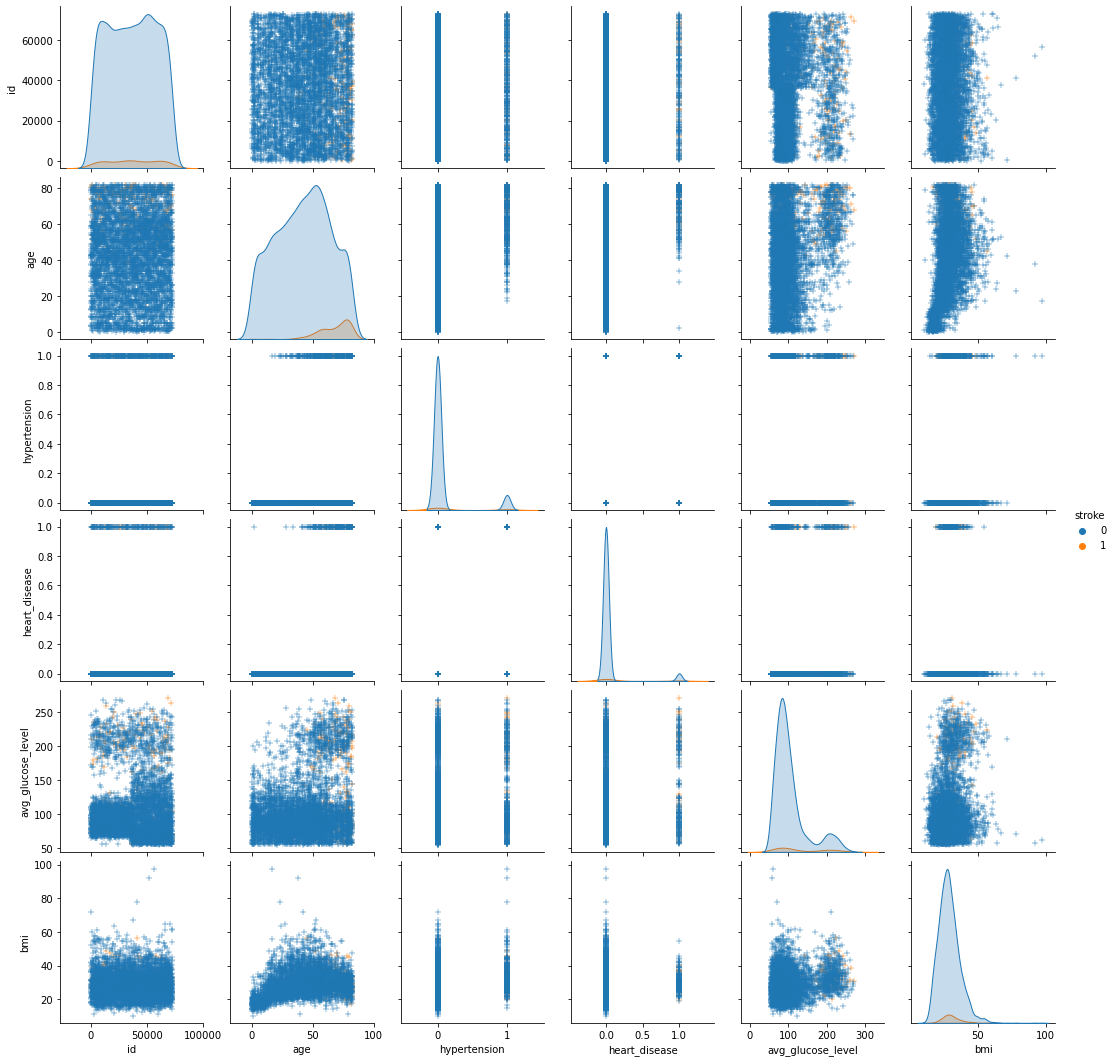

In [58]:
sns.pairplot(strokes, hue='stroke', markers='+')

In [51]:
strokesTrain = strokes.sample(frac=0.7, random_state=1) 
strokesVal = strokes.drop(strokesTrain.index)

yTrain = strokesTrain["stroke"]
xTrain = strokesTrain.drop("stroke", axis = 1).drop("id", axis = 1).drop("gender", axis = 1).drop("ever_married", axis = 1)
xTrain = xTrain.drop("work_type", axis = 1).drop("Residence_type", axis = 1).drop("smoking_status", axis = 1).drop("bmi", axis = 1)
print(xTrain)

yVal = strokesVal["stroke"]
xVal = strokesVal.drop("stroke", axis = 1).drop("id", axis = 1).drop("gender", axis = 1).drop("ever_married", axis = 1)
xVal = xVal.drop("work_type", axis = 1).drop("Residence_type", axis = 1).drop("smoking_status", axis = 1).drop("bmi", axis = 1)
print(xVal)

       age  hypertension  heart_disease  avg_glucose_level
4673  42.0             0              0             112.98
3232  78.0             0              0              78.29
3694  28.0             0              0              73.27
1070  81.0             0              0             246.34
4163  52.0             0              0              97.05
...    ...           ...            ...                ...
2978  42.0             0              0             107.83
3454  62.0             0              0              60.39
3954  55.0             0              0              99.64
634   28.0             0              0              85.79
3686  80.0             1              0             218.00

[3577 rows x 4 columns]
       age  hypertension  heart_disease  avg_glucose_level
0     67.0             0              1             228.69
2     80.0             0              1             105.92
14    79.0             0              1             214.09
15    50.0             1       

In [52]:
means = strokesTrain.groupby(["stroke"]).mean() #średnie
var = strokesTrain.groupby(["stroke"]).var()
prior = (strokesTrain.groupby(["stroke"]).count()/len(strokesTrain)).iloc[:,1]
classes = np.unique(strokesTrain["stroke"].tolist())

In [53]:
def Normal(n, mu, var):
    sd = np.sqrt(var)
    pdf = (np.e ** (-0.5 * ((n - mu)/sd) ** 2)) / (sd * np.sqrt(2 * np.pi))    
    return pdf

def Predict(X):
    Predictions = []
    
    for i in X.index: # Loop through each instances
        
        ClassLikelihood = []
        instance = X.loc[i]
        
        for cls in classes: # Loop through each class
            
            FeatureLikelihoods = []
            FeatureLikelihoods.append(np.log(prior[cls])) # Append log prior of class 'cls'
            
            for col in xTrain.columns: # Loop through each feature
                
                data = instance[col]
                
                mean = means[col].loc[cls] # Find the mean of column 'col' that are in class 'cls'
                variance = var[col].loc[cls] # Find the variance of column 'col' that are in class 'cls'
                
                Likelihood = Normal(data, mean, variance)
                
                if Likelihood != 0:
                    Likelihood = np.log(Likelihood) # Find the log-likelihood evaluated at x
                else:
                    Likelihood = 1/len(irisTrain) 
                
                FeatureLikelihoods.append(Likelihood)
                
            TotalLikelihood = sum(FeatureLikelihoods) # Calculate posterior
            ClassLikelihood.append(TotalLikelihood)
            
        MaxIndex = ClassLikelihood.index(max(ClassLikelihood)) # Find largest posterior position
        Prediction = classes[MaxIndex]
        Predictions.append(Prediction)
        
    return Predictions

In [54]:
PredictTrain = Predict(xTrain)
PredictVal = Predict(xVal)

In [55]:
def Accuracy(y, prediction):
    
    # Function to calculate accuracy
    y = list(y)
    prediction = list(prediction)
    score = 0
    
    for i, j in zip(y, prediction):
        if i == j:
            score += 1
            
    return score / len(y)

In [56]:
round(Accuracy(yTrain, PredictTrain), 5)

0.87615

In [57]:
round(Accuracy(yVal, PredictVal), 5)

0.88584